# Project: Wrangling and Analyze Data

In [54]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [55]:
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [56]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image_predictions.tsv',  mode='wb') as file:
    file.write(response.content)
    

In [57]:
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,4.65e-01,True,collie,1.57e-01,True,Shetland_sheepdog,6.14e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5.07e-01,True,miniature_pinscher,7.42e-02,True,Rhodesian_ridgeback,7.20e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,5.96e-01,True,malinois,1.39e-01,True,bloodhound,1.16e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,4.08e-01,True,redbone,3.61e-01,True,miniature_pinscher,2.23e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,5.60e-01,True,Rottweiler,2.44e-01,True,Doberman,1.55e-01,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [58]:
tweets=[]
data= {
    'tweet_id' : [],
    'retweet_count': [],
    'favorite_count': []
}
tweet_data=[]

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        data['tweet_id'].append(tweets['id'])
        data['retweet_count'].append(tweets['retweet_count'])
        data['favorite_count'].append(tweets['favorite_count'])
    tweet_data.append(data)

In [59]:

tweet_df= pd.DataFrame(data, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [60]:
tweet_df.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [61]:
twitter_archive.head(50)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [62]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [63]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
image_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,4.65e-01,True,collie,1.57e-01,True,Shetland_sheepdog,6.14e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5.07e-01,True,miniature_pinscher,7.42e-02,True,Rhodesian_ridgeback,7.20e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,5.96e-01,True,malinois,1.39e-01,True,bloodhound,1.16e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,4.08e-01,True,redbone,3.61e-01,True,miniature_pinscher,2.23e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,5.60e-01,True,Rottweiler,2.44e-01,True,Doberman,1.55e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,6.51e-01,True,English_springer,2.64e-01,True,Greater_Swiss_Mountain_dog,1.62e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,9.33e-01,False,mud_turtle,4.59e-02,False,terrapin,1.79e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,6.93e-01,True,Tibetan_mastiff,5.83e-02,True,fur_coat,5.44e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,9.62e-01,False,shopping_basket,1.46e-02,False,golden_retriever,7.96e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,2.01e-01,True,komondor,1.92e-01,True,soft-coated_wheaten_terrier,8.21e-02,True


In [65]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [66]:
image_df.duplicated().sum()

0

In [67]:
image_df['p3_conf'].min()

1.7401699999999998e-10

In [68]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [69]:
tweet_df.duplicated().sum()

0

In [70]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Quality issues
1. Incorrect dog names such as the, none, a ,an...

2. Missing data in the following columns  in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

3. Retweeted_status timestamp and timestamp columns should be of type datetime

4. Source column is not useful since they are all sourced from twitter for iphone.

5. probaility format in image table changes

6. Erroneous datatype in columns: Tweet_id, in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id..

7. None value in the last four columns are string and not nonetype

8. names in image_df(p1, p2,p3) have underscores separating them instead of spaces

9. outarageous rating digits in both numerator and denominator

### Tidiness issues
1. dogo floofer pupper puppo should be one column dog stage

2. tweet_df shojuld be a part of twitter_archive table

3. duplicate column tweet_ids

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [71]:
# Make copies of original pieces of data
twit_arc = twitter_archive.copy()
imagec_df = image_df.copy()
tweetc_df = tweet_df.copy()

### Quality Issues 

### Issue 1. Incorrect Dog names

#### Define: Drop the Column

In [72]:
def drop_col(df, col):
    df.drop(columns=col, axis=1, inplace=True)
    df.info()

#### Code and test.

In [73]:
drop_col(twit_arc, 'name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 294.6+ KB


###  2. Missing data in the following columns  in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Define: drop these columns in twit_arc

#### code and test

In [74]:
col_to_drop=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
drop_col(twit_arc, col_to_drop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


###  3. timestamp column should be of type datetime

#### change the datatype of the columns from object to datetime

#### code

In [75]:
twit_arc.timestamp = pd.to_datetime(twit_arc.timestamp)

#### test

In [76]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 184.1+ KB


### 4. Source column has four categorical source locations

#### Define: change the datatype of source to category 

#### code

In [77]:
def change_dtype(df,col, dtype):
    df[col]= df[col].astype(dtype)
    display(df[col].dtypes)

#### test

In [78]:
change_dtype(twit_arc, 'source', 'category')

CategoricalDtype(categories=['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                 ordered=False)

### 5. probaility format in image table changes

#### Define: change format of float to display in scientific format

#### code 

In [79]:
pd.set_option('display.float_format', '{:.2e}'.format)
imagec_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,4.65e-01,True,collie,1.57e-01,True,Shetland_sheepdog,6.14e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5.07e-01,True,miniature_pinscher,7.42e-02,True,Rhodesian_ridgeback,7.20e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,5.96e-01,True,malinois,1.39e-01,True,bloodhound,1.16e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,4.08e-01,True,redbone,3.61e-01,True,miniature_pinscher,2.23e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,5.60e-01,True,Rottweiler,2.44e-01,True,Doberman,1.55e-01,True


#### test

In [80]:
imagec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 6. Erroneous datatype in columns: Tweet_id, in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id..

#### Define: change the datatype of tweet_id in all 3 dataframes to object

#### code and test

In [81]:
df= [twit_arc, imagec_df, tweetc_df]
for table in df:
    change_dtype(table, 'tweet_id', str)

dtype('O')

dtype('O')

dtype('O')

### 7. None values are considered strings and not missing values 

####  Define: replace 'None' with None 

#### code

In [82]:
import numpy as np
stages=['doggo', 'floofer', 'pupper', 'puppo']
twit_arc[stages]= twit_arc[stages].replace('None', np.nan)

#### test

In [83]:
type(twit_arc.doggo[0])

float

In [84]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 168.2+ KB


In [85]:
twit_arc.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,NaN,NaN,NaN


### 8. names in image_df(p1, p2,p3) have underscores separating them instead of spaces

####  Define: replace underscores in the predictions with space

#### code and test

In [86]:
col=['p1', 'p2','p3']
for p in col:
    imagec_df[p] = imagec_df[p].str.replace('_', ' ')
imagec_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,4.65e-01,True,collie,1.57e-01,True,Shetland sheepdog,6.14e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5.07e-01,True,miniature pinscher,7.42e-02,True,Rhodesian ridgeback,7.20e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,5.96e-01,True,malinois,1.39e-01,True,bloodhound,1.16e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,4.08e-01,True,redbone,3.61e-01,True,miniature pinscher,2.23e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,5.60e-01,True,Rottweiler,2.44e-01,True,Doberman,1.55e-01,True


### 9. inconsistent rating format

#### Define: extract rating_numerator to fix certain outliers


#### code

In [87]:
twit_arc['rating_numerator'] = twit_arc.text.str.extract('(\d+)/\d+', expand=True)


In [88]:

twit_arc.rating_numerator= twit_arc.rating_numerator.astype(int)


#### test

In [89]:
twit_arc.describe()

,rating_numerator,rating_denominator
count,2.36e+03,2.36e+03
mean,1.31e+01,1.05e+01
std,4.59e+01,6.75e+00
min,0.00e+00,0.00e+00
25%,1.00e+01,1.00e+01
50%,1.10e+01,1.00e+01
75%,1.20e+01,1.00e+01
max,1.78e+03,1.70e+02


#### Define: make the rating over ten and drop the rating_denominator coumn

#### code

In [90]:
twit_arc.rating_numerator= pd.to_numeric((twit_arc.rating_numerator* 10)/ twit_arc.rating_denominator, errors='coerce')
twit_arc.rating_denominator=pd.to_numeric((twit_arc.rating_denominator* 10)/ twit_arc.rating_denominator, errors= 'coerce')


In [91]:
 twit_arc.drop(columns= 'rating_denominator', axis=1, inplace=True)


#### test

In [92]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id            2356 non-null object
timestamp           2356 non-null datetime64[ns]
source              2356 non-null category
text                2356 non-null object
rating_numerator    2356 non-null float64
doggo               97 non-null object
floofer             10 non-null object
pupper              257 non-null object
puppo               30 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 149.8+ KB


In [93]:
twit_arc.head(2)

,tweet_id,timestamp,source,text,rating_numerator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.30e+01,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1.30e+01,NaN,NaN,NaN,NaN


### Tidiness Issues

1. dogo floofer pupper puppo should be one column dog stage

2. tweet_df shojuld be a part of twitter_archive table

3. duplicate column tweet_ids

### 9.  dogo floofer pupper puppo should be one column dog stage

#### Define: Join the four columns into one column called dog_stage and delete the four columns stated

#### code

In [94]:

twit_arc['dog_stage']= twit_arc[twit_arc.columns[5:]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)) , axis=1)
twit_arc.head(10)

,tweet_id,timestamp,source,text,rating_numerator,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.30e+01,NaN,NaN,NaN,NaN,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1.30e+01,NaN,NaN,NaN,NaN,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1.20e+01,NaN,NaN,NaN,NaN,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,1.30e+01,NaN,NaN,NaN,NaN,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1.20e+01,NaN,NaN,NaN,NaN,
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,1.30e+01,NaN,NaN,NaN,NaN,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,1.30e+01,NaN,NaN,NaN,NaN,
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,1.30e+01,NaN,NaN,NaN,NaN,
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,1.30e+01,NaN,NaN,NaN,NaN,
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,1.40e+01,doggo,NaN,NaN,NaN,doggo


In [95]:
stages=['doggo', 'floofer', 'pupper', 'puppo']
twit_arc.drop(columns = stages, axis=1, inplace=True)

In [96]:
twit_arc.dog_stage=twit_arc.dog_stage.str.replace('None','')
twit_arc.dog_stage=twit_arc.dog_stage.str.replace(',','')



#### test

In [97]:
display(twit_arc.dog_stage.value_counts())
twit_arc.info()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id            2356 non-null object
timestamp           2356 non-null datetime64[ns]
source              2356 non-null category
text                2356 non-null object
rating_numerator    2356 non-null float64
dog_stage           2356 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 94.6+ KB


### 10.  tweetc_df and imagec_df should be a part of twitter_archive table

#### Define: merge imagec_df to twit_arc using left join

#### Code

In [98]:
twit_arc= twit_arc.merge(tweetc_df, on= 'tweet_id', how='left')
twit_arc.head(1)

,tweet_id,timestamp,source,text,rating_numerator,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.30e+01,,8.85e+03,3.95e+04


In [99]:
twit_arc= twit_arc.merge(imagec_df, on= 'tweet_id', how='left')
twit_arc.head(1)

,tweet_id,timestamp,source,text,rating_numerator,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.30e+01,,8.85e+03,3.95e+04,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.00e+00,orange,9.70e-02,False,bagel,8.59e-02,False,banana,7.61e-02,False


#### Test

In [100]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id            2356 non-null object
timestamp           2356 non-null datetime64[ns]
source              2356 non-null category
text                2356 non-null object
rating_numerator    2356 non-null float64
dog_stage           2356 non-null object
retweet_count       2354 non-null float64
favorite_count      2354 non-null float64
jpg_url             2075 non-null object
img_num             2075 non-null float64
p1                  2075 non-null object
p1_conf             2075 non-null float64
p1_dog              2075 non-null object
p2                  2075 non-null object
p2_conf             2075 non-null float64
p2_dog              2075 non-null object
p3                  2075 non-null object
p3_conf             2075 non-null float64
p3_dog              2075 non-null object
dtypes: category(1), datetime64[ns](1), float64(7), object(10)
memory usage: 352.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [101]:
twit_arc.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, i will  analyze and visualize the data from twitter_archived_master.csv

In [102]:
twit_arc= pd.read_csv('twitter_archive_master.csv')

#### Here's a list of questions i asked myself
does dog stages affect vote count

range of votes for each dog stage

how accurate the model is in predicting the images

does higher vote mean higher retweets? i.e do cuter dogs get more retweets and favourite count

what time of the day are tweets made?
#### For now i'll answer the first four questions.


In [103]:
twit_arc.head()

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.30e+01,NaN,8.85e+03,3.95e+04,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.00e+00,orange,9.70e-02,False,bagel,8.59e-02,False,banana,7.61e-02,False
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1.30e+01,NaN,6.51e+03,3.38e+04,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.00e+00,Chihuahua,3.24e-01,True,Pekinese,9.06e-02,True,papillon,6.90e-02,True
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1.20e+01,NaN,4.33e+03,2.55e+04,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.00e+00,Chihuahua,7.16e-01,True,malamute,7.83e-02,True,kelpie,3.14e-02,True
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,1.30e+01,NaN,8.96e+03,4.29e+04,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.00e+00,paper towel,1.70e-01,False,Labrador retriever,1.68e-01,True,spatula,4.08e-02,False
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1.20e+01,NaN,9.77e+03,4.10e+04,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.00e+00,basset,5.56e-01,True,English springer,2.26e-01,True,German short-haired pointer,1.75e-01,True


In [104]:
dog_stage=twit_arc.dog_stage.value_counts()
dog_stage

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
dog_stage

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

 A lot of the dog stages were not stated in the tweets but from the ones mentioned, pupper seems to be the most popular dog stage
 

In [107]:
twit_arc.describe()

,Unnamed: 0,tweet_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.36e+03,2.36e+03,2.36e+03,2.35e+03,2.35e+03,2.08e+03,2.08e+03,2.08e+03,2.08e+03
mean,1.18e+03,7.43e+17,inf,3.16e+03,8.08e+03,1.20e+00,5.95e-01,1.35e-01,6.03e-02
std,6.80e+02,6.86e+16,nan,5.28e+03,1.18e+04,5.62e-01,2.71e-01,1.01e-01,5.09e-02
min,0.00e+00,6.66e+17,0.00e+00,0.00e+00,0.00e+00,1.00e+00,4.43e-02,1.01e-08,1.74e-10
25%,5.89e+02,6.78e+17,1.00e+01,6.24e+02,1.42e+03,1.00e+00,3.64e-01,5.39e-02,1.62e-02
50%,1.18e+03,7.20e+17,1.10e+01,1.47e+03,3.60e+03,1.00e+00,5.88e-01,1.18e-01,4.94e-02
75%,1.77e+03,7.99e+17,1.20e+01,3.65e+03,1.01e+04,1.00e+00,8.44e-01,1.96e-01,9.18e-02
max,2.36e+03,8.92e+17,inf,7.95e+04,1.33e+05,4.00e+00,1.00e+00,4.88e-01,2.73e-01


From the stats above, the second prediction has the most accuracy with a mean of 0.135 with the first prediction tailing it and lastly the third predictions. Favorite count is higher than retweet count. i'd like to know if this is general for all dog_stages.


i'll create a new dataframe twit_arc_ds(twit_arc grouped by dog_stage) where i'll collate all data i need for my visualization to answer my questions.

In [108]:
twit_arc_ds= twit_arc.groupby('dog_stage')['retweet_count', 'favorite_count', 'rating_numerator'].sum()
twit_arc_ds

,retweet_count,favorite_count,rating_numerator
dog_stage,,,
doggo,6.24e+05,1.30e+06,9.86e+02
doggofloofer,3.43e+03,1.72e+04,1.10e+01
doggopupper,6.09e+04,1.21e+05,1.35e+02
doggopuppo,1.92e+04,4.78e+04,1.30e+01
floofer,3.74e+04,9.96e+04,1.07e+02
pupper,7.03e+05,1.61e+06,2.66e+03
puppo,1.78e+05,4.99e+05,3.51e+02


 Favorite count is higher than retweet count in all dog_stages. People are more likely to like and pass along than they are to retweet.


In [109]:
twit_arc_ds['stage_count']=  twit_arc.groupby('dog_stage')['dog_stage'].count()
twit_arc_ds.reset_index(inplace=True)
twit_arc_ds

,dog_stage,retweet_count,favorite_count,rating_numerator,stage_count
0,doggo,6.24e+05,1.30e+06,9.86e+02,83
1,doggofloofer,3.43e+03,1.72e+04,1.10e+01,1
2,doggopupper,6.09e+04,1.21e+05,1.35e+02,12
3,doggopuppo,1.92e+04,4.78e+04,1.30e+01,1
4,floofer,3.74e+04,9.96e+04,1.07e+02,9
5,pupper,7.03e+05,1.61e+06,2.66e+03,245
6,puppo,1.78e+05,4.99e+05,3.51e+02,29


In [110]:
twit_arc_ds['avg_fc']=twit_arc_ds['favorite_count']/ twit_arc_ds['stage_count']
twit_arc_ds['avg_rc']=twit_arc_ds['retweet_count']/ twit_arc_ds['stage_count']
twit_arc_ds['avg_rn']=twit_arc_ds['rating_numerator']/ twit_arc_ds['stage_count']
twit_arc_ds

,dog_stage,retweet_count,favorite_count,rating_numerator,stage_count,avg_fc,avg_rc,avg_rn
0,doggo,6.24e+05,1.30e+06,9.86e+02,83,1.57e+04,7.52e+03,1.19e+01
1,doggofloofer,3.43e+03,1.72e+04,1.10e+01,1,1.72e+04,3.43e+03,1.10e+01
2,doggopupper,6.09e+04,1.21e+05,1.35e+02,12,1.01e+04,5.07e+03,1.12e+01
3,doggopuppo,1.92e+04,4.78e+04,1.30e+01,1,4.78e+04,1.92e+04,1.30e+01
4,floofer,3.74e+04,9.96e+04,1.07e+02,9,1.11e+04,4.16e+03,1.19e+01
5,pupper,7.03e+05,1.61e+06,2.66e+03,245,6.56e+03,2.87e+03,1.09e+01
6,puppo,1.78e+05,4.99e+05,3.51e+02,29,1.72e+04,6.15e+03,1.21e+01


In [111]:
twit_arc_ds.stage_count.sum()

380

twit_arc_ds is the cleaned twit_arc dataframe grouped by dog stages. The dataset contains dog_stages of 380 tweets(dogs), the dog stage names, the retweet count, favourite count, rating_numerator(vote) and their averages(i.e average vote per dog in each stage).

In [112]:
def bar_chart(data, x_axis, y_axis, Title):
    data.plot(x_axis, y_axis , kind='bar', title= Title)
    plt.ylabel(y_axis)
    plt.show()

In [113]:
twit_arc_ds.describe()

,retweet_count,favorite_count,rating_numerator,stage_count,avg_fc,avg_rc,avg_rn
count,7.00e+00,7.00e+00,7.00e+00,7.00e+00,7.00e+00,7.00e+00,7.00e+00
mean,2.32e+05,5.28e+05,6.09e+02,5.43e+01,1.79e+04,6.91e+03,1.17e+01
std,3.01e+05,6.59e+05,9.66e+02,8.88e+01,1.38e+04,5.65e+03,7.45e-01
min,3.43e+03,1.72e+04,1.10e+01,1.00e+00,6.56e+03,2.87e+03,1.09e+01
25%,2.83e+04,7.37e+04,6.00e+01,5.00e+00,1.06e+04,3.79e+03,1.11e+01
50%,6.09e+04,1.21e+05,1.35e+02,1.20e+01,1.57e+04,5.07e+03,1.19e+01
75%,4.01e+05,9.01e+05,6.68e+02,5.60e+01,1.72e+04,6.83e+03,1.20e+01
max,7.03e+05,1.61e+06,2.66e+03,2.45e+02,4.78e+04,1.92e+04,1.30e+01


Vote count is in the range 10-13 with an average of 11.7

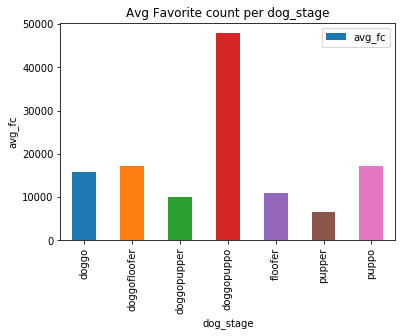

In [114]:
bar_chart(twit_arc_ds, 'dog_stage', 'avg_fc', 'Avg Favorite count per dog_stage' )

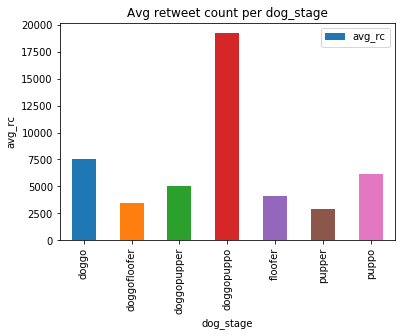

In [115]:
bar_chart(twit_arc_ds, 'dog_stage', 'avg_rc', 'Avg retweet count per dog_stage')

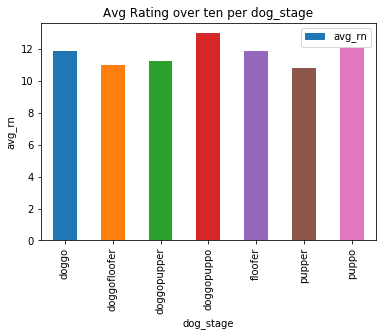

In [116]:
bar_chart(twit_arc_ds, 'dog_stage', 'avg_rn', 'Avg Rating over ten per dog_stage')

The dog stage doggo,puppo has the highest average vote count of 13 and is the most retweeted and liked of all the dog stages.

### Insights:
1. The second prediction has the most accuracy with a mean of 0.135 with the first prediction tailing it and lastly the third predictions.


2.  Favorite count is higher than retweet count in all dog_stages. People are more likely to like and pass along than they are to retweet.


3. The dog stage doggo,puppo has the highest average vote count of 13 and is the most retweeted and liked of all the dog stages.